In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
import re
import json
from sklearn.model_selection import train_test_split

# Load train data

In [2]:
humi = pd.read_csv('data/created_datasets/humi_funlines_all_train_upaired.csv')
oneliners = pd.read_csv('data/created_datasets/humorous_oneliners_train.csv')
puns = pd.read_csv('data/created_datasets/puns_train.csv')

In [4]:
numberjokes = pd.DataFrame({
    'dataset': ['Humicroedit + Funlines', 'Oneliners', 'Puns'],
    'n_samples': [sum(humi.label), oneliners.shape[0], puns.shape[0]]
})
numberjokes

,dataset,n_samples
0,Humicroedit + Funlines,4720.0
1,Oneliners,4200.0
2,Puns,3860.0


In [6]:
len_humi = [len(i.split(' ')) for i in humi['text']]
len_one = [len(i.split(' ')) for i in oneliners['text']]
len_pun = [len(i.split(' ')) for i in puns['text']]

Text(0.5, 1.0, 'Number of positive samples in each dataset')

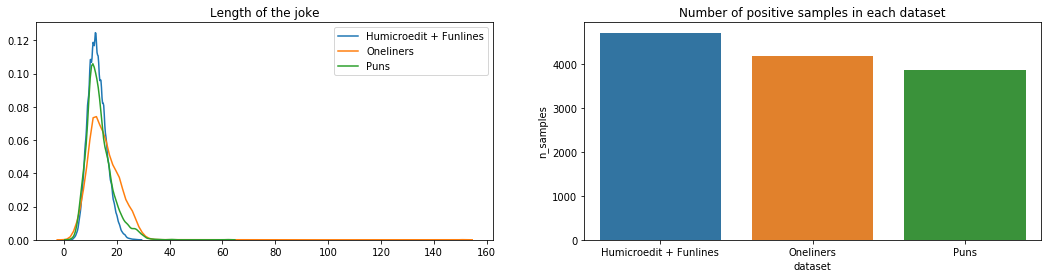

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (18,4))
sns.kdeplot(len_humi, label='Humicroedit + Funlines', ax=axs[0])
sns.kdeplot(len_one, label='Oneliners', ax=axs[0])
sns.kdeplot(len_pun, label='Puns', ax=axs[0])
sns.barplot(x="dataset", y="n_samples", data=numberjokes, ax=axs[1])
axs[0].set_title('Length of the joke')
axs[1].set_title('Number of positive samples in each dataset')

In [8]:
proverbs = pickle.load(open('data/crowdtruth/datasets/proverbs.pickle', 'rb'))
proverbs_df = pd.DataFrame({
    'text': proverbs,
    'len': [len(i.split(' ')) for i in proverbs],
    'basic_score': np.zeros(len(proverbs)),
    'source': ['proverbs' for i in range(len(proverbs))]
})
reuters = pickle.load(open('data/crowdtruth/datasets/reuters_headlines.pickle', 'rb'))
reuters_df = pd.DataFrame({
    'text': reuters,
    'len': [len(i.split(' ')) for i in reuters],
    'basic_score': np.zeros(len(reuters)),
    'source': ['reuters' for i in range(len(reuters))]
})
wiki = pickle.load(open('data/crowdtruth/datasets/wiki_sentences.pickle', 'rb'), encoding='latin1')
wiki_df = pd.DataFrame({
    'text': wiki,
    'len': [len(i.split(' ')) for i in wiki],
    'basic_score': np.zeros(len(wiki)),
    'source': ['wiki' for i in range(len(wiki))]
})

In [9]:
not_joke_len = pd.DataFrame({
    'dataset': ['Proverbs', 'Reuters headlines', 'Wiki sentences'],
    'n_samples': [proverbs_df.shape[0], reuters_df.shape[0], wiki_df.shape[0]]
})
not_joke_len

,dataset,n_samples
0,Proverbs,1019
1,Reuters headlines,5243
2,Wiki sentences,5251


Text(0.5, 1.0, 'Number of samples in each dataset')

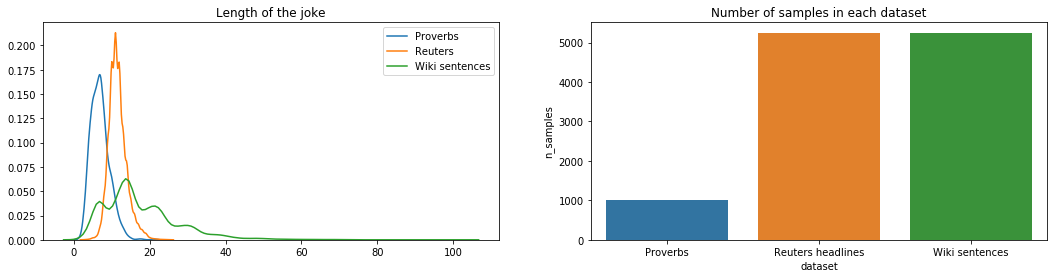

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (18,4))
sns.kdeplot(proverbs_df['len'], label='Proverbs', ax=axs[0])
sns.kdeplot(reuters_df['len'], label='Reuters', ax=axs[0])
sns.kdeplot(wiki_df['len'], label='Wiki sentences', ax=axs[0])
sns.barplot(x="dataset", y="n_samples", data=not_joke_len, ax=axs[1])
axs[0].set_title('Length of the joke')
axs[1].set_title('Number of samples in each dataset')